#### Уровень 0:
Придумайте матрицы, которые обладают следующими свойствами:  
* Диагональная, ортогональная, но не единичная(!)  
* Верхнетреугольная, ортогональная  
* Нижнетреугольная, ортогональная  
* Матрица, у которой определитель = 1, и все элементы не равны 0  

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!  
Найдите собственные значения и собственные вектора матриц:  
m = np.array([[2, 2],  [1, 3]])  
print(m)  

##### Диагональная, ортогональная, но не единичная(!)

In [1]:
import numpy as np

In [2]:
# так как в условиях единичной матрицы сказано, что это частный случай диагональной, и числа в диагонале = 1
# то если все числа главной диагонали диагональной матрицы = -1 мы не нарушим условия задачи, так как 1 != -1, 
# значит матрица не идиничная)
matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, -1]])
matrix

array([[-1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0, -1]])

In [3]:
# проверка на ортогональность 
matrix_trnsp = matrix.transpose()
matrix.dot(matrix_trnsp)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

##### Верхнетреугольная, ортогональная; Нижнетреугольная, ортогональная

In [4]:
# так как основое требование, чтобы элементы под главной диагональю были равны 0, 
#то можно использовать любую матрицу, которая удовлетворяет этим условиям
matrix_up_triugl = np.array([[1, 0], [0, -1]])
matrix_up_triugl

array([[ 1,  0],
       [ 0, -1]])

In [5]:
# проверка на ортогональность 
matrix_up_triugl_trnsp = matrix_up_triugl.transpose()
matrix_up_triugl.dot(matrix_up_triugl_trnsp)

array([[1, 0],
       [0, 1]])

##### Матрица, у которой определитель = 1, и все элементы не равны 0

In [6]:
matrix_det_1 = np.array([[1, 1], [1, 2]])
matrix_det_1

array([[1, 1],
       [1, 2]])

In [7]:
np.linalg.det(matrix_det_1)

1.0

##### Найдите собственные значения и собственные вектора матриц:

In [8]:
m = np.array([[2, 2], [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [9]:
w, v = np.linalg.eig(m)

In [10]:
#Собственные числа входной матрицы
w

array([1., 4.])

In [11]:
#Собственные векторы входной матрицы.
v

array([[-0.89442719, -0.70710678],
       [ 0.4472136 , -0.70710678]])

##### Уровень 1:
Найдите спектральное разложение матрицы:  
m = np.array([[1, 2],  
              [2,3]])  
print(m)  
Постройте зависимость качества восстановления рукописных цифр (MNIST)  
в зависимости от различного количества   компонент PCA. В качестве метрики различия предлагаю использовать MSE.*  

##### Найдите спектральное разложение матрицы

In [12]:
import numpy as np
import pylab as pl

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits

In [13]:
m = np.array([[1, 2],
              [2, 3]])

In [14]:
a, U = linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [15]:
# проверка
np.array(U.dot(np.diag(a)).dot(U.T), dtype=float)

array([[1., 2.],
       [2., 3.]])

##### Постройте зависимость качества восстановления рукописных цифр (MNIST)  в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

In [48]:
# Загрузим картинки с цифрами
digits = load_digits()
X = digits.data

64

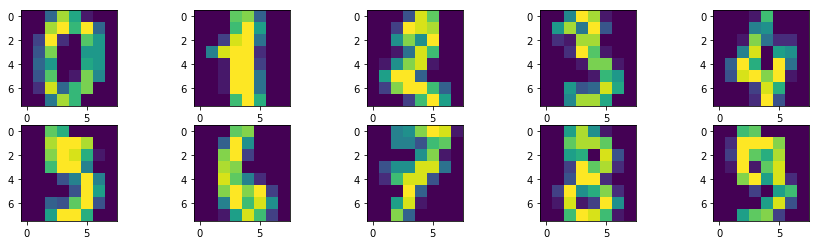

In [140]:
# для наглядности
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8])); # формируем из нашего вектора матрицу 8 на 8
# В данном случае расмерность признакового пространства - 64, так как картинки представлены матрицей 8 на 8
# и если эту матрицу развернуть в вектор, получится 64
# длина вектора  X[0] цифра 0
len(X[0])

In [66]:
from sklearn.decomposition import PCA

In [133]:
# Снизим размерность признакового пространства до 16 и 32 признаков
pca_16 = PCA(n_components=16)
X_reduced_16 = pca_16.fit_transform(X)

pca_36 = PCA(n_components=36)
X_reduced_36 = pca_36.fit_transform(X)

In [143]:
# Восстановим наши данные после снижения размерности с помощью метода inverse_transform(X) 
X_reduced_16_inverse = pca_16.inverse_transform(X_reduced_16)
X_reduced_36_inverse = pca_36.inverse_transform(X_reduced_36)

In [144]:
from sklearn.metrics import mean_squared_error

In [149]:
mean_squared_error(X_reduced_16_inverse, X)

2.827240363851214

In [147]:
mean_squared_error(X_reduced_36_inverse, X)

0.39382810985543615

In [ ]:
# Метрика MSE показывает, что чем больше призанаковое пространство, 
# тем меньше среднеквадратичное отклоенение от эталона

In [182]:
mean_squared = []
n = []
X = digits.data
for i in range(len(X[0,:])):
    n_com = PCA(n_components=i)
    X_reduced = n_com.fit_transform(X)
    X_reduced_inverse = n_com.inverse_transform(X_reduced)
    mean_squared.append(mean_squared_error(X_reduced_inverse, X))
    n.append(i)

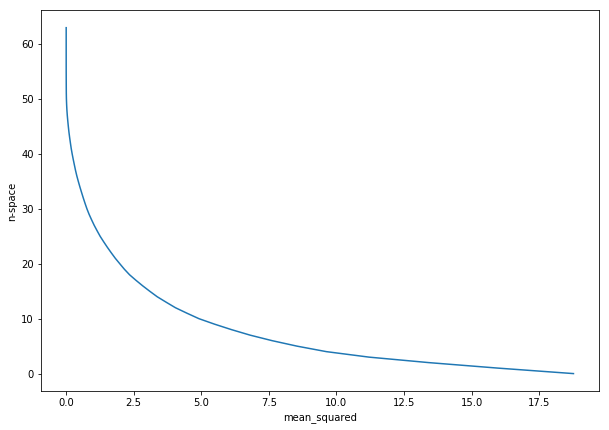

In [187]:
# из графика видно, что чем больше n-мерное пространсво, тем меньше ошибка по метрике MSE
plt.figure(figsize=(10,7))
plt.xlabel('mean_squared')
plt.ylabel('n-space')
plt.plot(mean_squared, n)

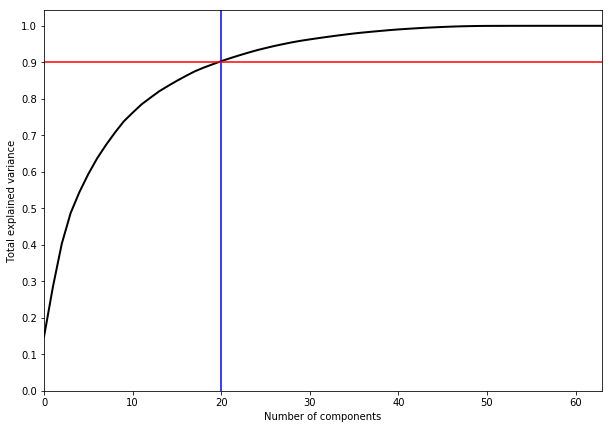

In [189]:
# Для сохранения 90% данных нам нужно 21 мерное пространство
pca = decomposition.PCA().fit(X)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(20, c='b')
plt.axhline(0.9, c='r')
plt.show();